In [1]:
import pandas as pd 

import numpy as np 

import seaborn as sns 

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('data.xlsx') 

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

#### convert date into proper format

In [9]:
df["journy_day"]= pd.to_datetime(df.Date_of_Journey, 
                                   format="%d/%m/%Y").dt.day

In [10]:
df["journy_month"]= pd.to_datetime(df.Date_of_Journey, 
                                   format="%d/%m/%Y").dt.month

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
df["Dep_hours"]=pd.to_datetime(df["Dep_Time"]).dt.hour

In [15]:
df["Dep_min"]=pd.to_datetime(df["Dep_Time"]).dt.minute 

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_hours,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
df.drop(["Dep_Time"],axis=1,inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_hours,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
df["Arrival_hours"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

In [20]:
df["Arrival_min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute 

In [21]:
df.drop(["Arrival_Time"],axis=1,inplace=True) 

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
#Time taken by plane to reach destination is called Duration

# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list

duration = list(df["Duration"])

for i in range(len(duration)):

    if len(duration[i].split()) != 2: 

        if "h" in duration[i]:

            duration[i] = duration[i].strip() + " 0m" 


        else:

            duration[i] = "0h " + duration[i] 

duration_hours = []

duration_mins = []

for i in range(len(duration)):

    duration_hours.append(int(duration[i].split(sep = "h")[0])) 


    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 



In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
df["Duration_hours"] = duration_hours

df["Duration_mins"] = duration_mins

In [26]:
df.drop(["Duration"],axis=1 ,inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

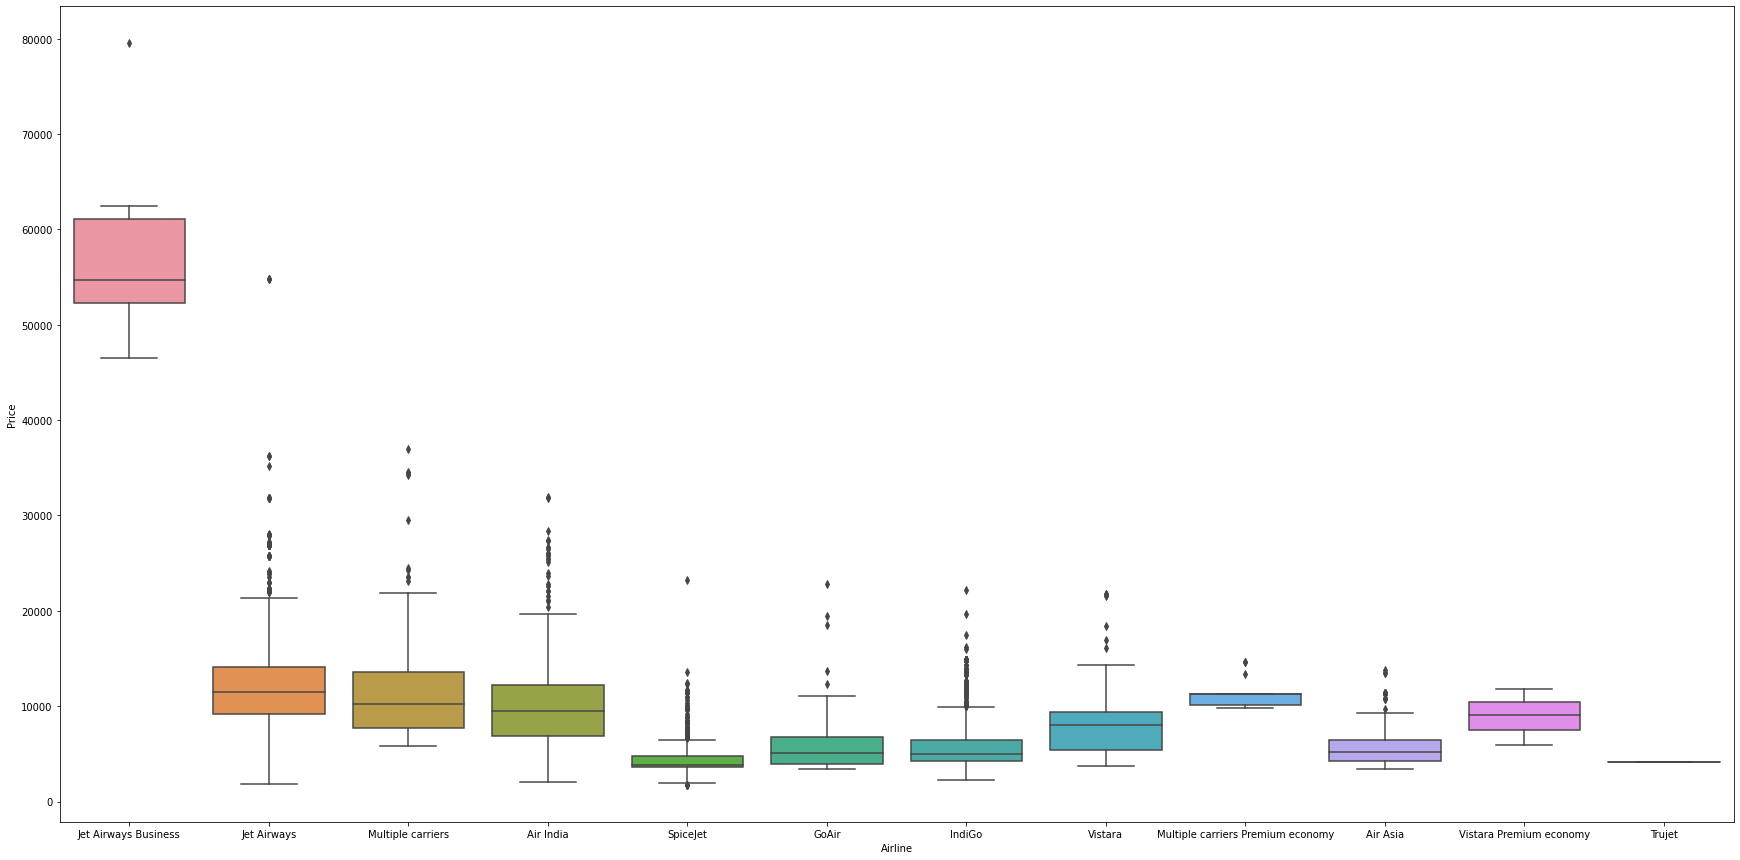

In [29]:
%matplotlib inline
plt.figure(figsize=(30,15))

sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

plt.show()

In [30]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

#### one hot encoding

In [31]:
Airline=df["Airline"]

Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

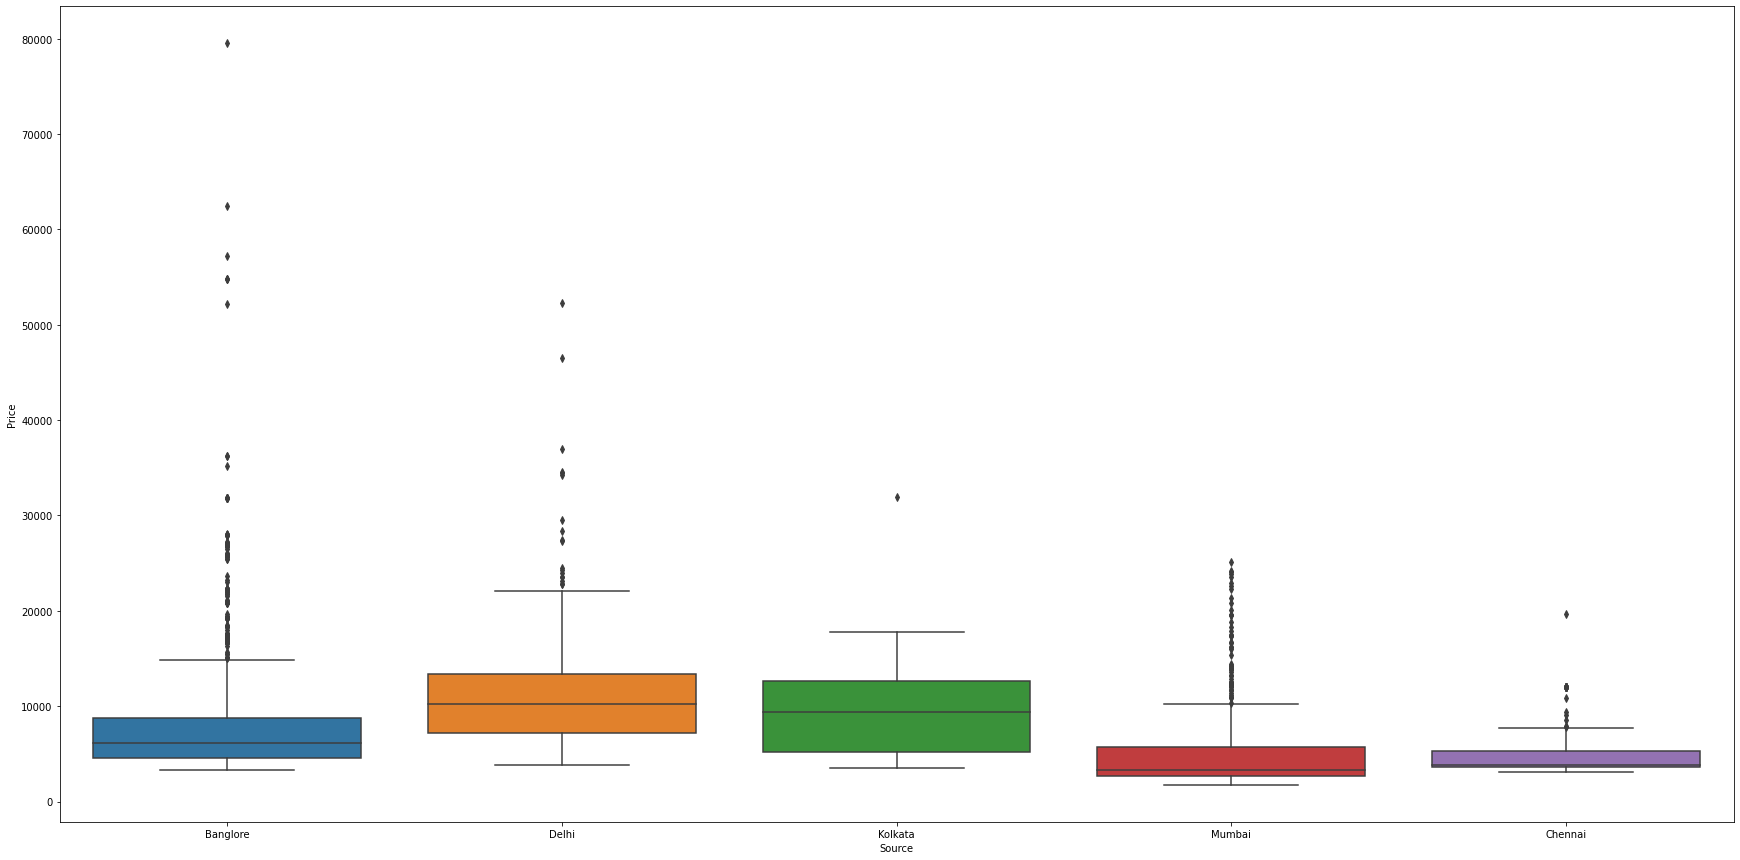

In [33]:
plt.figure(figsize=(30,15))

sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

In [34]:
Source=df["Source"]

Source=pd.get_dummies(Source,drop_first=True)

In [35]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
Destination=df["Destination"]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
df["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → CCU → HYD                   1
BOM → UDR → DEL → HYD             1
BLR → HBX → BOM → BHO → DEL       1
CCU → IXZ → MAA → BLR             1
BOM → DED → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [38]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [40]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [41]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journy_day,journy_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [42]:
df_train=pd.concat([df,Airline,Source, Destination],axis=1)

df_train.head()

,Airline,Source,Destination,Total_Stops,Price,journy_day,journy_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
df_train.drop(["Airline","Source","Destination"],axis=1, inplace=True)

In [44]:
df_train.head()

,Total_Stops,Price,journy_day,journy_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
df_train.shape

(10682, 30)

# Test data

In [46]:
df=pd.read_excel('test.xlsx') 

In [47]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [48]:
df.shape

(2671, 10)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [50]:
df["journy_day"]= pd.to_datetime(df.Date_of_Journey, 
                                   format="%d/%m/%Y").dt.day

In [51]:
df["journy_month"]= pd.to_datetime(df.Date_of_Journey, 
                                   format="%d/%m/%Y").dt.month

In [52]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [53]:
df["Dep_hours"]=pd.to_datetime(df["Dep_Time"]).dt.hour

In [54]:
df["Dep_min"]=pd.to_datetime(df["Dep_Time"]).dt.minute 

In [55]:
df.drop(["Dep_Time"],axis=1,inplace=True)

In [56]:
df["Arrival_hours"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

In [57]:
df["Arrival_min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute 

In [58]:
df.drop(["Arrival_Time"],axis=1,inplace=True) 

In [59]:
#Time taken by plane to reach destination is called Duration

# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list

duration = list(df["Duration"])

for i in range(len(duration)):

    if len(duration[i].split()) != 2: 

        if "h" in duration[i]:

            duration[i] = duration[i].strip() + " 0m" 


        else:

            duration[i] = "0h " + duration[i] 

duration_hours = []

duration_mins = []

for i in range(len(duration)):

    duration_hours.append(int(duration[i].split(sep = "h")[0])) 


    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 



In [60]:
df["Duration_hours"] = duration_hours

df["Duration_mins"] = duration_mins

In [61]:
df.drop(["Duration"],axis=1 ,inplace=True)

In [62]:
Airline=df["Airline"]

Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [63]:
Source=df["Source"]

Source=pd.get_dummies(Source,drop_first=True)

Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [64]:
Destination=df["Destination"]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [65]:
df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [66]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [67]:
df_test=pd.concat([df,Airline,Source, Destination],axis=1)

df_test.head()

,Airline,Source,Destination,Total_Stops,journy_day,journy_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [68]:
df_test.drop(["Airline","Source","Destination"],axis=1, inplace=True)

In [69]:
df_test.head()

,Total_Stops,journy_day,journy_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Feature selection

In [70]:
df_train.shape

(10682, 30)

In [71]:
df_train.columns

Index(['Total_Stops', 'Price', 'journy_day', 'journy_month', 'Dep_hours',
       'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [72]:
x=df_train.loc[:,['Total_Stops', 'journy_day', 'journy_month',

       'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',

       'Duration_hours', 'Duration_mins', 'Air India', 'GoAir', 'IndiGo',

       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',

       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',

       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',

       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]

 


In [73]:
x.head()

,Total_Stops,journy_day,journy_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
y=df_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [75]:
corr_matrix = df_train.corr()

corr_matrix['Price'].sort_values(ascending=False)

Price                                1.000000
Total_Stops                          0.603897
Duration_hours                       0.508778
Jet Airways                          0.416124
Delhi                                0.270676
Cochin                               0.270676
Jet Airways Business                 0.253303
New Delhi                            0.189777
Multiple carriers                    0.139793
Air India                            0.050432
Arrival_hours                        0.024244
Multiple carriers Premium economy    0.017650
Kolkata                              0.009358
Dep_hours                            0.006799
Vistara Premium economy             -0.000454
Trujet                              -0.010381
Dep_min                             -0.024458
Vistara                             -0.060654
Arrival_min                         -0.086155
GoAir                               -0.095151
journy_month                        -0.103643
Duration_mins                     

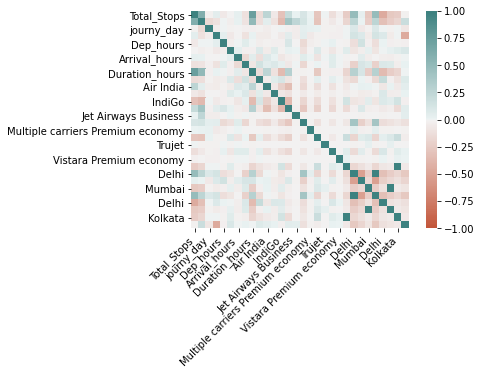

In [76]:
corr = df_train.corr()

ax = sns.heatmap(

    corr, 

    vmin=-1, vmax=1, center=0,

    cmap=sns.diverging_palette(20, 190, n=2000),

    square=True

)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);

In [77]:
from sklearn.model_selection import cross_val_score 

In [78]:
from sklearn.ensemble import RandomForestRegressor  

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =

0.4, random_state = 42)

In [80]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()

reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [81]:
reg_rf.score(x_train,y_train) 

0.9566549444067942

In [82]:
reg_rf.score(x_test,y_test) 

0.8042845561971723

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=10)

model=RandomForestRegressor() 


scores=cross_val_score(model,x,y,cv=skfold)

print(np.mean(scores))

0.8076083196471053


In [85]:
import pickle

file = open('flight_rf.pkl', 'wb')


pickle.dump(reg_rf, file)

In [86]:
model = open('flight_rf.pkl','rb')

forest = pickle.load(model)

In [87]:
y_prediction = forest.predict(x_test)

In [88]:
from sklearn import metrics

In [89]:
metrics.r2_score(y_test, y_prediction)

0.8042845561971723